In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('Iris.csv').iloc[:,1:-1]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df = PCA(n_components = 2).fit_transform(df.values)

In [4]:
def euclidean_distance(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

In [5]:
class DBSCAN:
    def __init__(self,min_samples=5,epsilon=1):
        self.min_samples = min_samples
        self.epsilon = epsilon
        
    def _neighbors(self,sample_i):
        neighbors = []
        ids = np.arange(self.X.shape[0])
        for i, sample in enumerate(self.X[ids != sample_i]):
            if euclidean_distance(self.X[sample_i],sample) < self.epsilon:
                neighbors.append(i)
        return np.array(neighbors)
    
    def _expand(self, sample_i, neighbors):
        cluster = [sample_i]
        for i in neighbors:
            if i not in self.visited_samples:
                self.visited_samples.append(i)
                self.neighbors[i] = self._neighbors(i)
                if len(self.neighbors[i]) >= self.min_samples:
                    expanded_cluster = self._expand(i,self.neighbors[i])
                    cluster = cluster + expanded_cluster
                else:
                    cluster.append(i)
        return cluster
    
    def _get_label(self):
        labels = np.full(shape=self.X.shape[0], fill_value=len(self.clusters))
        for i, cluster in enumerate(self.clusters):
            for sample in cluster:
                labels[sample] = i
        return labels
    
    def fit_predict(self,X):
        self.X = X
        self.clusters = []
        self.visited_samples = []
        self.neighbors = {}
        n_samples = self.X.shape[0]
        for i in range(n_samples):
            if i in self.visited_samples:
                continue
            self.neighbors[i] = self._neighbors(i)
            if len(self.neighbors[i]) >= self.min_samples:
                self.visited_samples.append(i)
                new_cluster = self._expand(i,self.neighbors[i])
                self.clusters.append(new_cluster)
        return self._get_label()

In [6]:
Y = DBSCAN().fit_predict(df)

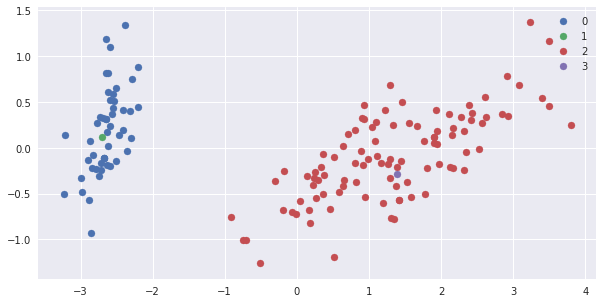

In [7]:
fig = plt.figure(figsize=(10,5))
colors = sns.color_palette()
for no, i in enumerate(np.unique(Y)):
    plt.scatter(df[Y==i,0], df[Y==i,1], color=colors[no],label = no)
plt.legend()
plt.show()